In [6]:
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as sklp
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [10]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


<Axes: >

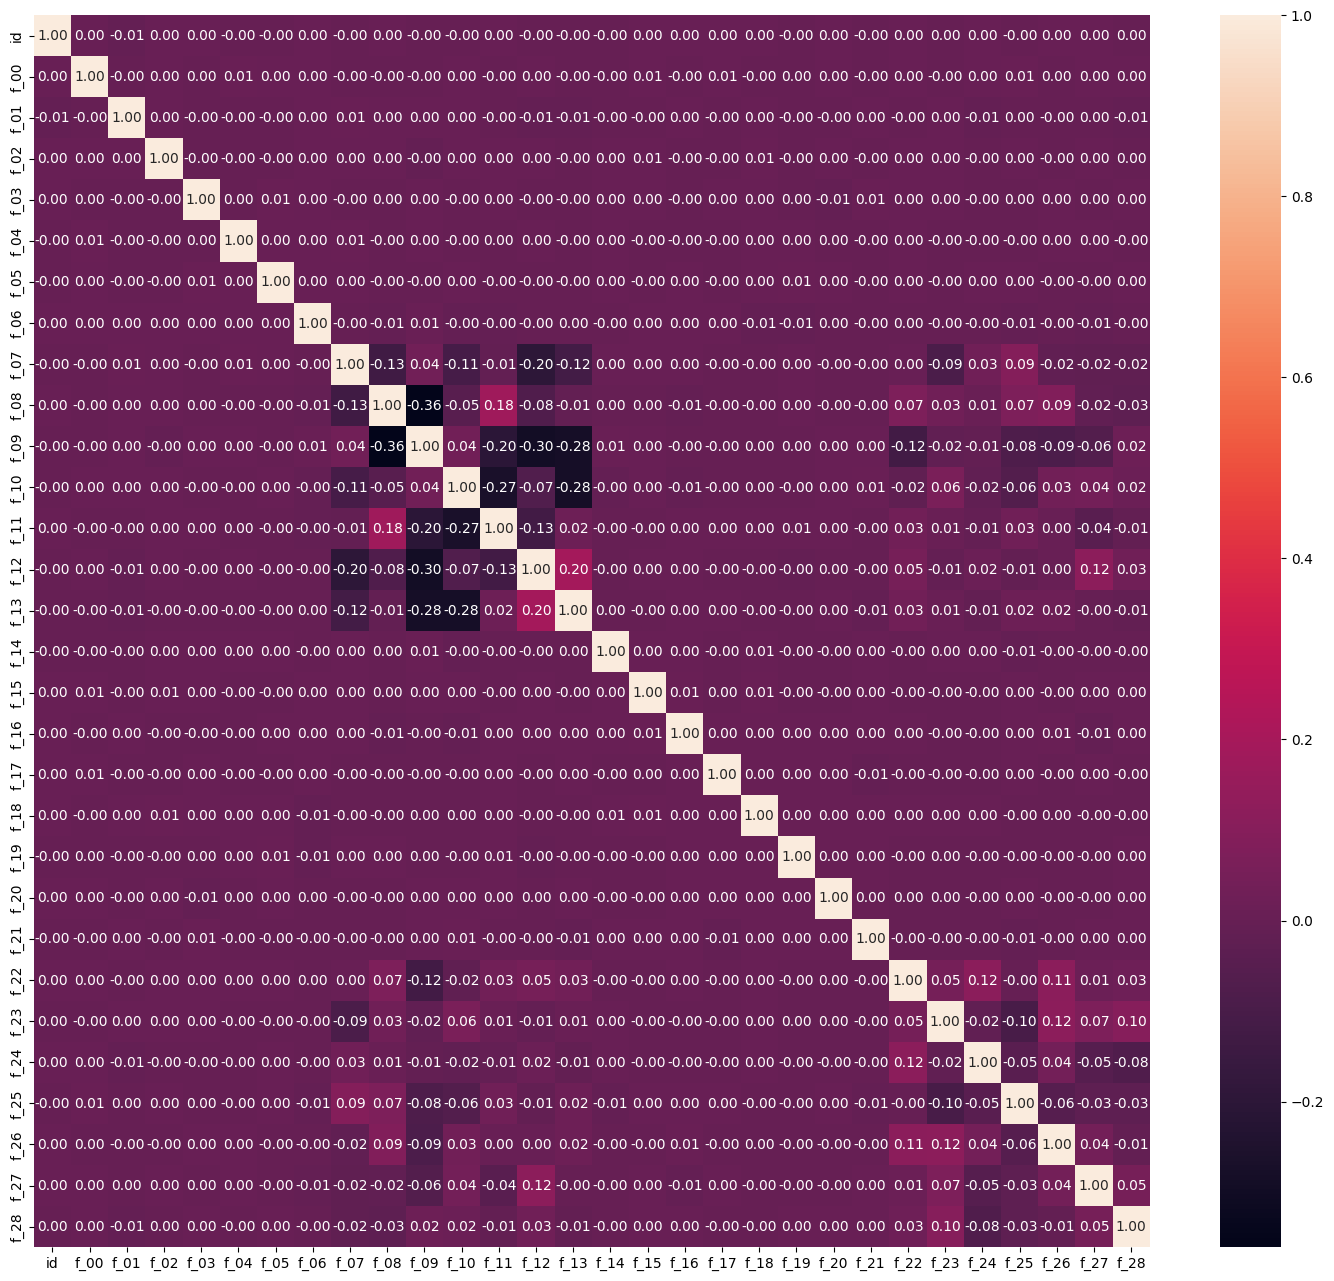

In [30]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [14]:
sscaler = StandardScaler()

df_s = sscaler.fit_transform(df)

In [15]:
df_s

array([[-1.73203313, -0.3895505 , -0.91769495, ...,  0.96048158,
         1.04529612,  0.68332274],
       [-1.73199779, -0.6885438 , -0.45919476, ..., -0.55294213,
         0.3554352 , -1.60267076],
       [-1.73196244,  0.80560694,  0.31875345, ...,  0.97917134,
        -0.92625017, -2.22432704],
       ...,
       [ 1.73196244, -0.24988501, -0.46478181, ...,  1.54422962,
         1.1855134 ,  0.57075203],
       [ 1.73199779,  0.30932332,  2.17805293, ..., -1.08428749,
        -0.5474945 ,  0.10775421],
       [ 1.73203313,  0.75184799,  0.56149   , ..., -0.63608329,
         1.00085474, -0.31416284]])

In [25]:
n_cluster = range(1,50)
inertia = []

for k in n_cluster:
    km = KMeans(n_clusters = k)
    km.fit(df_s)
    inertia.append(km.inertia_)

C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

In [26]:
inertia

[2940000.0000000093,
 2825181.189730983,
 2748152.136919738,
 2689864.050659629,
 2644534.438311345,
 2613470.8366852044,
 2588127.649033014,
 2565103.794140902,
 2546170.8874823307,
 2529080.0439505884,
 2513652.1786701274,
 2499575.364666948,
 2487554.8209977513,
 2475912.4293146646,
 2464265.659150099,
 2454968.1865795013,
 2444447.5827273033,
 2435526.8966978686,
 2426467.5908990987,
 2417468.494005664,
 2409462.7678251346,
 2401238.9035640974,
 2393690.3431442278,
 2386479.6706737992,
 2379593.4866320156,
 2373576.723725131,
 2366519.4548434676,
 2359988.806180906,
 2354317.340852217,
 2348514.182338651,
 2342214.7275604447,
 2337176.7517361515,
 2331415.750098824,
 2325925.824637016,
 2321472.4752475233,
 2315713.0949605955,
 2311985.6446561585,
 2307445.1768057626,
 2302420.9916341617,
 2298642.8016566103,
 2294331.174835646,
 2290267.5704881726,
 2286552.0397306215,
 2282369.1175273694,
 2277002.7879549274,
 2273806.23509538,
 2271108.909040379,
 2267858.2817693227,
 2264511.80

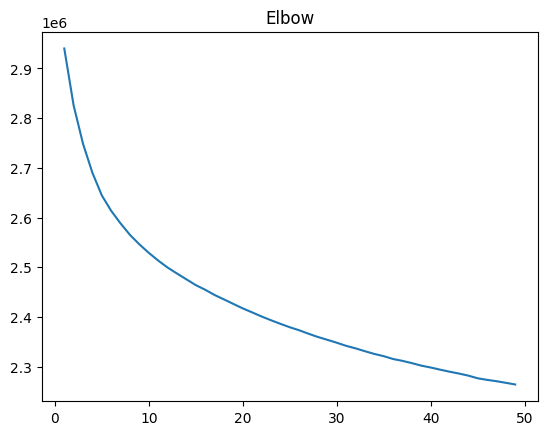

In [27]:
plt.title('Elbow')
plt.plot(n_cluster, inertia)
plt.show()

In [34]:
silhouettes = []
for i in range(5, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_s)
    labels = kmeans.labels_

    silhouettes.append(silhouette_score(df_s, labels))

C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

Silhouette Score: [0.03523430476787629, 0.03315847001401558, 0.03182336013107237, 0.03150968981577207, 0.030538407171454295, 0.029564206410027643, 0.02924148474320247, 0.028936765013243906, 0.027305775202212206, 0.026992029272769547, 0.026122634598411076, 0.026276168435484876, 0.02646347317122337, 0.026179422716590357, 0.0264166100718059]
Silhouette Score: [0.03523430476787629, 0.03315847001401558, 0.03182336013107237, 0.03150968981577207, 0.030538407171454295, 0.029564206410027643, 0.02924148474320247, 0.028936765013243906, 0.027305775202212206, 0.026992029272769547, 0.026122634598411076, 0.026276168435484876, 0.02646347317122337, 0.026179422716590357, 0.0264166100718059] K 5
Silhouette Score: [0.03523430476787629, 0.03315847001401558, 0.03182336013107237, 0.03150968981577207, 0.030538407171454295, 0.029564206410027643, 0.02924148474320247, 0.028936765013243906, 0.027305775202212206, 0.026992029272769547, 0.026122634598411076, 0.026276168435484876, 0.02646347317122337, 0.0261794227165

In [44]:
print("Silhouette Score:", silhouettes)

Silhouette Score: [0.03523430476787629, 0.03315847001401558, 0.03182336013107237, 0.03150968981577207, 0.030538407171454295, 0.029564206410027643, 0.02924148474320247, 0.028936765013243906, 0.027305775202212206, 0.026992029272769547, 0.026122634598411076, 0.026276168435484876, 0.02646347317122337, 0.026179422716590357, 0.0264166100718059]


In [45]:
n_cluster = range(1,10)
inertia = []

for k in n_cluster:
    km = KMeans(n_clusters = k)
    km.fit(df_s)
    inertia.append(km.inertia_)

C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

In [46]:
inertia

[2940000.0000000093,
 2825184.319474654,
 2748148.933078477,
 2689862.557337149,
 2644534.2627703375,
 2613461.6088621933,
 2588127.4069268797,
 2565099.1062449864,
 2546168.320919387]

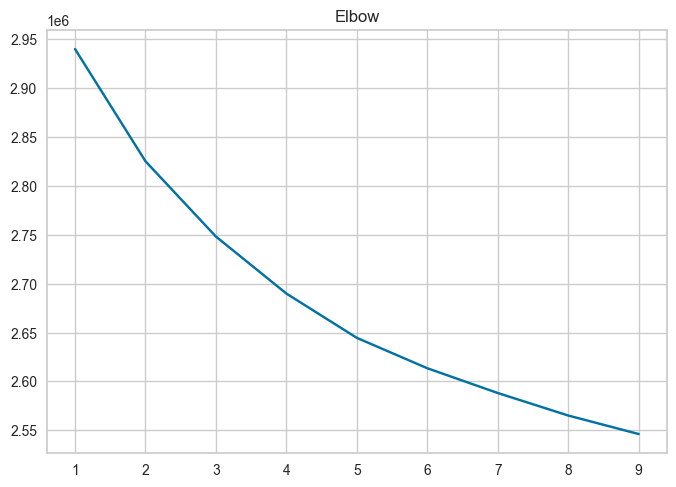

In [47]:
plt.title('Elbow')
plt.plot(n_cluster, inertia)
plt.show()

In [50]:
silhouettess = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_s)
    labels = kmeans.labels_

    silhouettess.append(silhouette_score(df_s, labels))

C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

In [51]:
silhouettess

[0.03956441718216617,
 0.03635775958232421,
 0.03562954318318934,
 0.03523463332275461,
 0.03312366128771963,
 0.03182355841194361,
 0.0315128705925511,
 0.03056582603573592]

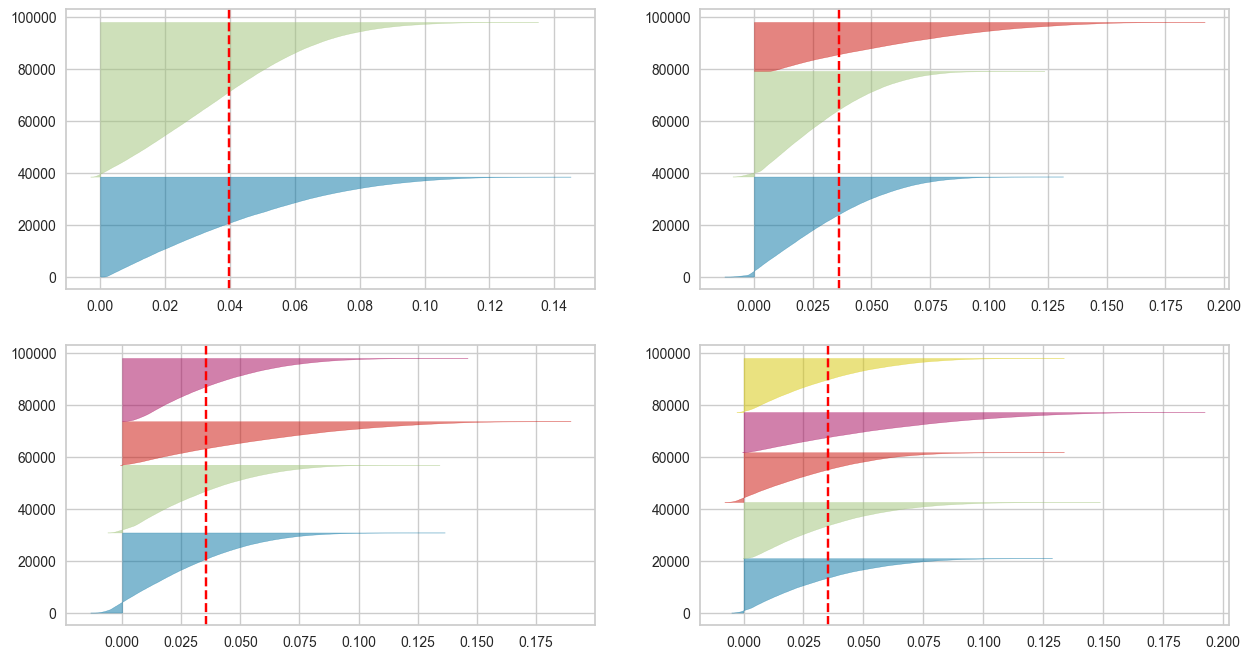

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_s)

# Hierarchical Cluster

In [61]:
n_clusters = 2
agglomerative_clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
labels = agglomerative_clustering.fit_predict(df_s)

MemoryError: Unable to allocate 35.8 GiB for an array with shape (4801951000,) and data type float64

In [ ]:
labels

# Dendrogram

In [60]:
matrix = linkage(df_s, 'ward')
plot = plt.figure(figsize=(20,8)) # IF DOESN'T FIT IN YOUR DISPLAY, PLEASE CHANGE 20 TO A LOWER NUMBER
dendrogram(matrix, color_threshold=0)
plt.title('Hierarchical Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

MemoryError: Unable to allocate 35.8 GiB for an array with shape (4801951000,) and data type float64